In [1]:
import importlib.util
spec = importlib.util.spec_from_file_location("bltmat", "/Users/claudiopierard/WRF/bltmat.py")
blt = importlib.util.module_from_spec(spec)
spec.loader.exec_module(blt)

In [2]:
import numpy as np
import scipy as spy
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy.optimize as optimization
%matplotlib inline
import datetime
#import matplotlib.dates as mdates

In [29]:
ceilo_color = '#F0F8FF'
h48_color = '#FBC0C0'
h24_color = '#defec8'

## Diciembre

- **Extraer datos**

In [3]:
month_avg = np.loadtxt('/Users/claudiopierard/WRF/Datos/promedios/dic_promedios.dat')

In [4]:
month_avg[:,0]

array([ 1002.308,   774.808,   701.923,   653.077,   612.308,   640.192,
         565.577,   634.423,   658.077,   800.   ,   802.885,  1014.423,
        1541.538,  1874.808,  2320.   ,  2389.423,  2444.423,  2303.654])

### 24h
##### Gráfica de ceilo en cada hora  y PBLH en coordenada más cercana al CCA

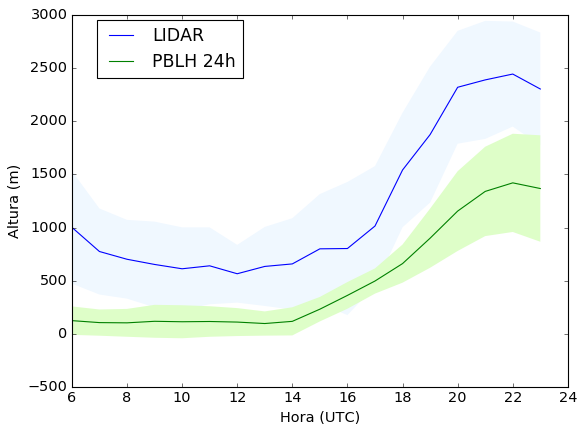

In [30]:
h_range= range(6,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
plt.fill_between(h_range, month_avg[:,0] - month_avg[:,1], month_avg[:,0] + month_avg[:,1], facecolor='#F0F8FF', alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,0], label = 'LIDAR')
plt.fill_between(h_range, month_avg[:,4] - month_avg[:,5], month_avg[:,4] + month_avg[:,5], facecolor= h24_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,4], c = 'g', label='PBLH 24h')
plt.ylabel('Altura (m)')
plt.xlabel('Hora (UTC)')
plt.legend(loc=(0.05,0.83))
plt.rcParams.update({'font.size': 13})

##### Gráfica de ceilo en pormediado en el intervalo  y PBLH coordenada más cercana al CCA

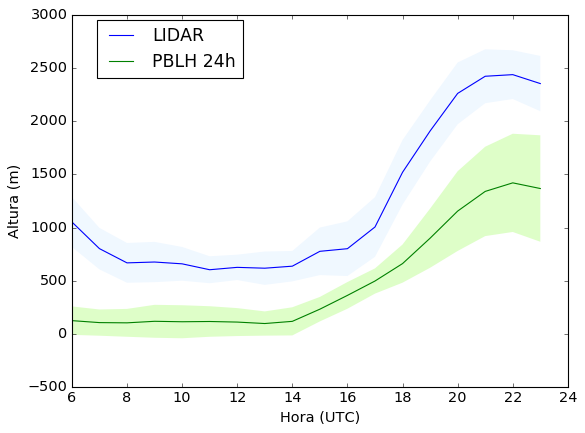

In [31]:
h_range= range(6,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
plt.fill_between(h_range, month_avg[:,2] - month_avg[:,3], month_avg[:,2] + month_avg[:,3], facecolor='#F0F8FF', alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,2], label = 'LIDAR')
plt.fill_between(h_range, month_avg[:,4] - month_avg[:,5], month_avg[:,4] + month_avg[:,5], facecolor= h24_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,4], c = 'g', label='PBLH 24h')
plt.ylabel('Altura (m)')
plt.xlabel('Hora (UTC)')
plt.legend(loc=(0.05,0.83))
plt.rcParams.update({'font.size': 13})

##### Gráfica de ceilo en hora y PBLH coordenada más cercana al CCA con promedio espacial

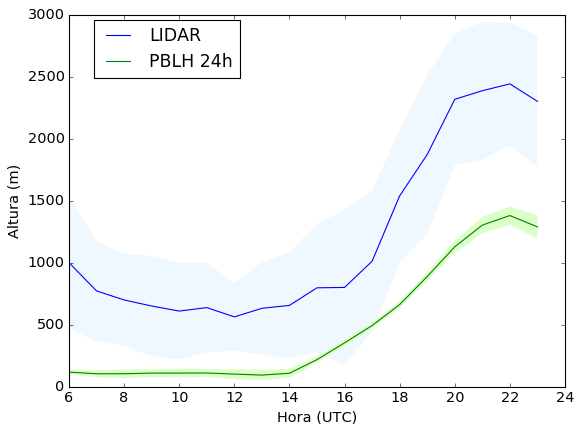

In [32]:
h_range= range(6,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
plt.fill_between(h_range, month_avg[:,0] - month_avg[:,1], month_avg[:,0] + month_avg[:,1], facecolor='#F0F8FF', alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,0], label = 'LIDAR')
plt.fill_between(h_range, month_avg[:,6] - month_avg[:,7], month_avg[:,6] + month_avg[:,7], facecolor=h24_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,6], c = 'g', label='PBLH 24h')
plt.ylabel('Altura (m)')
plt.xlabel('Hora (UTC)')
plt.legend(loc=(0.05,0.83))
plt.rcParams.update({'font.size': 13})

##### Gráfica de ceilo en pormediado en el intervalo  y PBLH con promedio espacial a coordenada más cercana al CCA

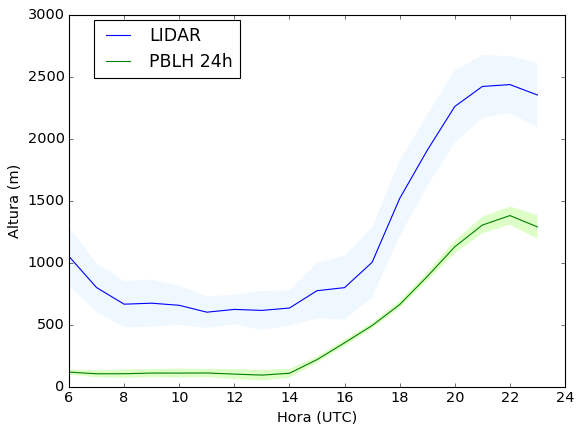

In [33]:
h_range= range(6,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
plt.fill_between(h_range, month_avg[:,2] - month_avg[:,3], month_avg[:,2] + month_avg[:,3], facecolor='#F0F8FF', alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,2], label = 'LIDAR')
plt.fill_between(h_range, month_avg[:,6] - month_avg[:,7], month_avg[:,6] + month_avg[:,7], facecolor=h24_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,6], c = 'g', label='PBLH 24h')
#plt.title('Promedios mensuales, espaciales y temporales en diciembre ')
plt.ylabel('Altura (m)')
plt.xlabel('Hora (UTC)')
plt.legend(loc=(0.05,0.83))

### 48 h

In [14]:
month_avg[:,11]

array([  27.354,   27.736,   29.775,   34.625,   29.282,   32.272,
         43.169,   42.184,   39.893,   33.757,   29.216,   28.28 ,
         36.882,   46.213,   55.531,   95.767,   81.328,  106.991])

#### ceilo promedio en hora y pblh en 1 coord. 

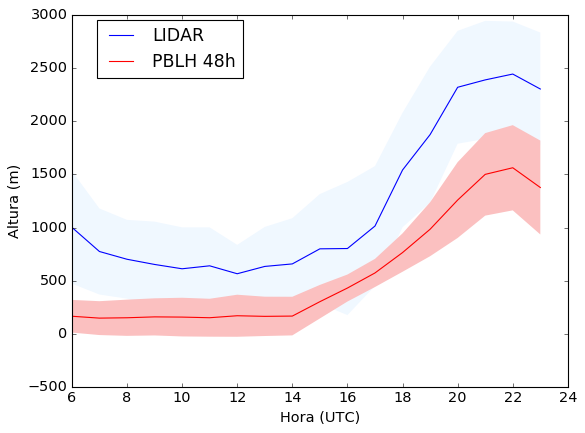

In [28]:
h_range= range(6,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
#ceilo
plt.fill_between(h_range, month_avg[:,0] - month_avg[:,1], month_avg[:,0] + month_avg[:,1], facecolor=ceilo_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,0], label = 'LIDAR')
#48h
plt.fill_between(h_range, month_avg[:,8] - month_avg[:,9], month_avg[:,8] + month_avg[:,9], facecolor=h48_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,8], c = 'r', label='PBLH 48h')
plt.ylabel('Altura (m)')
plt.xlabel('Hora (UTC)')
plt.legend(loc=(0.05,0.83))
plt.rcParams.update({'font.size': 13})
plt.savefig('ceilo_h_pblh_1coord')

#### ceilo promedio 1 h y pblh promedio espacial 

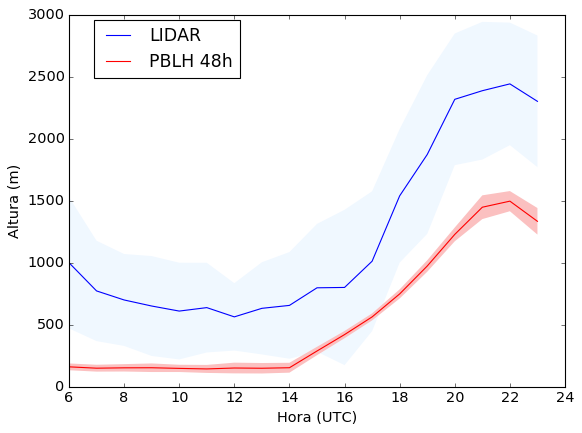

In [25]:
h_range= range(6,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
#ceilo
plt.fill_between(h_range, month_avg[:,0] - month_avg[:,1], month_avg[:,0] + month_avg[:,1], facecolor=ceilo_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,0], label = 'LIDAR')
#48h
plt.fill_between(h_range, month_avg[:,10] - month_avg[:,11], month_avg[:,10] + month_avg[:,11], facecolor=h48_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,10], c = 'r', label='PBLH 48h')
plt.ylabel('Altura (m)')
plt.xlabel('Hora (UTC)')
plt.legend(loc=(0.05,0.83))
plt.rcParams.update({'font.size': 13})

#### ceilo promedio en intervalo de tiempo y pblh en 1 coord. 

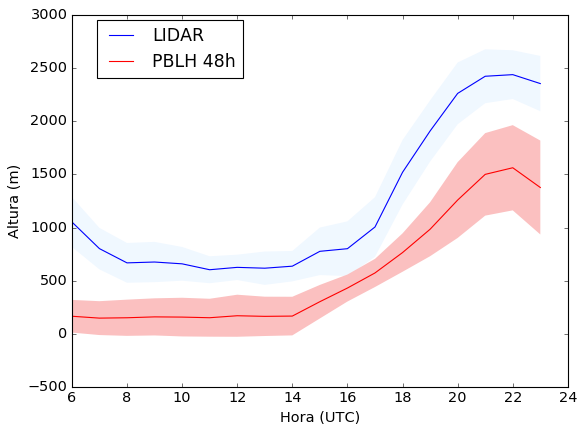

In [26]:
h_range= range(6,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
#ceilo
plt.fill_between(h_range, month_avg[:,2] - month_avg[:,3], month_avg[:,2] + month_avg[:,3], facecolor=ceilo_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,2], label = 'LIDAR')
#48h
plt.fill_between(h_range, month_avg[:,8] - month_avg[:,9], month_avg[:,8] + month_avg[:,9], facecolor=h48_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,8], c = 'r', label='PBLH 48h')
plt.ylabel('Altura (m)')
plt.xlabel('Hora (UTC)')
plt.legend(loc=(0.05,0.83))
plt.rcParams.update({'font.size': 13})

#### ceilo promedio en intervalo de tiempo y pblh promedio en el espacio

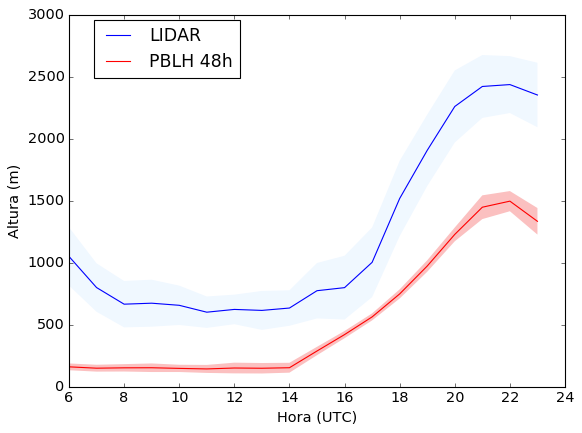

In [27]:
h_range= range(6,24)
plt.figure(figsize=(8,6))
#plt.plot(h_range, B)
#ceilo
plt.fill_between(h_range, month_avg[:,2] - month_avg[:,3], month_avg[:,2] + month_avg[:,3], facecolor=ceilo_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,2], label = 'LIDAR')
#48h
plt.fill_between(h_range, month_avg[:,10] - month_avg[:,11], month_avg[:,10] + month_avg[:,11], facecolor=h48_color, alpha=1.0, edgecolor='none')
plt.plot(h_range, month_avg[:,10], c = 'r', label='PBLH 48h')
plt.ylabel('Altura (m)')
plt.xlabel('Hora (UTC)')
plt.legend(loc=(0.05,0.83))
plt.rcParams.update({'font.size': 13})
plt.savefig

-----

Aquí es donde tengo que volver a extraer los datos para hacer los shotgun plots.

In [55]:
month_avg[:, 0]

array([ 1002.308,   774.808,   701.923,   653.077,   612.308,   640.192,
         565.577,   634.423,   658.077,   800.   ,   802.885,  1014.423,
        1541.538,  1874.808,  2320.   ,  2389.423,  2444.423,  2303.654])

In [60]:
month_avg[:,0][0:6]

array([ 1002.308,   774.808,   701.923,   653.077,   612.308,   640.192])

In [72]:
popt, pcov = optimization.curve_fit(blt.ajuste_lineal, month_avg[:,0], month_avg[:,4])

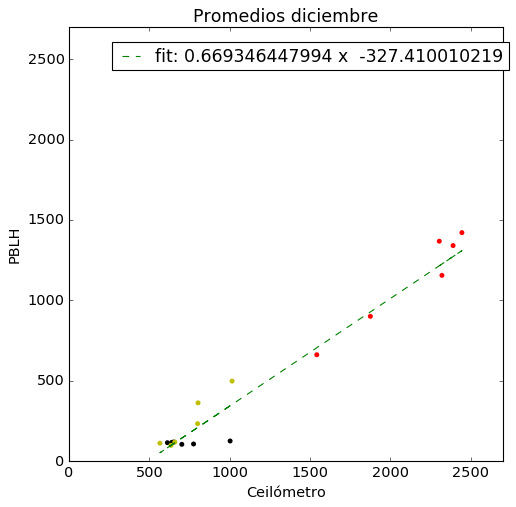

In [104]:
ajuste_legend = str(popt[0]) + ' x  ' + str(popt[1])
plt.figure(figsize=(7, 7))
plt.plot(month_avg[:,0] , blt.ajuste_lineal(month_avg[:,0], *popt), 'g--', label= 'fit: ' + ajuste_legend)
plt.scatter(month_avg[:,0][0:6], month_avg[:,4][0:6], c = 'k', edgecolors='none')
plt.scatter(month_avg[:,0][6:12], month_avg[:,4][6:12], c = 'y', edgecolors='none')
plt.scatter(month_avg[:,0][12:18], month_avg[:,4][12:18], c = 'r', edgecolors='none')
plt.title('Promedios diciembre')
plt.xlabel('Ceilómetro')
plt.ylabel('PBLH')
plt.ylim(0, 2700)
plt.xlim(0, 2700)
plt.legend(loc = (0.1,0.9))
plt.rcParams.update({'font.size': 13})


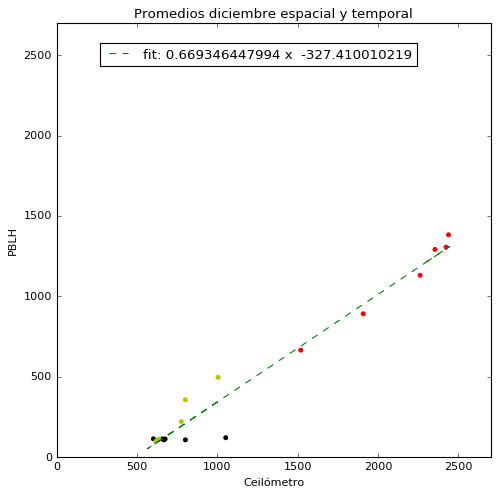

In [96]:
popt, pcov = optimization.curve_fit(ajuste_lineal, month_avg[:,2], month_avg[:,6])
ajuste_legend = str(popt[0]) + ' x  ' + str(popt[1])
plt.figure(figsize=(7, 7))
plt.plot(month_avg[:,0] , ajuste_lineal(month_avg[:,0], *popt), 'g--', label= 'fit: ' + ajuste_legend)
plt.scatter(month_avg[:,2][0:6], month_avg[:,6][0:6], c = 'k', edgecolors='none')
plt.scatter(month_avg[:,2][6:12], month_avg[:,6][6:12], c = 'y', edgecolors='none')
plt.scatter(month_avg[:,2][12:18], month_avg[:,6][12:18], c = 'r', edgecolors='none')
plt.title('Promedios diciembre espacial y temporal')
plt.xlabel('Ceilómetro')
plt.ylabel('PBLH')
plt.ylim(0, 2700)
plt.xlim(0, 2700)
plt.legend(loc = (0.1,0.9))

------

In [5]:
plt.figure(figsize=(8,6))
plt.plot

In [34]:
import os

In [35]:
os.makedirs('hola/')

In [37]:
path2graficas = "/Users/claudiopierard/WRF/Graficas/"
mm = 'dic'

In [38]:
u = path2graficas + mm + '_graficas/'

In [39]:
u

'/Users/claudiopierard/WRF/Graficas/dic_graficas/'

# Gunshot plots

In [45]:
file_dic_24 = sio.loadmat('/Users/claudiopierard/WRF/Datos/WRF/dic/12_24hrs_D2.mat')
dic_24 = blt.import_var_mat(file_dic_24, 'Atmos')
dt_ceilo, raw_ceilo, filt_ceilo = blt.read_ceilometro_month("/Users/claudiopierard/WRF/Datos/ceilometro/2015_utc/dic_2015_utc.dat")

In [ ]:
blt.read_ceilometro_month()

In [69]:
def search_hour_oclock(DT, RAW):
    indexes = []
    for i in range(0, len(DT)):
        if DT[i].minute == 0 and np.isnan(RAW[i]) == False:
            indexes.append(i)
    return indexes

In [70]:
search_hour_oclock(dt_ceilo, raw_ceilo)

[0,
 6,
 12,
 18,
 24,
 30,
 36,
 42,
 48,
 54,
 60,
 66,
 72,
 78,
 84,
 90,
 96,
 102,
 108,
 114,
 120,
 126,
 132,
 138,
 144,
 150,
 156,
 162,
 168,
 174,
 180,
 186,
 192,
 198,
 204,
 210,
 216,
 222,
 228,
 234,
 240,
 246,
 252,
 258,
 264,
 270,
 276,
 282,
 288,
 294,
 300,
 306,
 312,
 318,
 324,
 330,
 336,
 342,
 348,
 354,
 360,
 366,
 372,
 378,
 384,
 390,
 396,
 402,
 408,
 414,
 420,
 426,
 432,
 438,
 444,
 450,
 456,
 462,
 468,
 474,
 480,
 486,
 492,
 498,
 504,
 510,
 516,
 522,
 528,
 534,
 540,
 546,
 552,
 558,
 564,
 570,
 576,
 582,
 588,
 594,
 600,
 606,
 612,
 618,
 624,
 630,
 636,
 642,
 648,
 654,
 660,
 666,
 672,
 678,
 684,
 690,
 696,
 702,
 708,
 714,
 720,
 726,
 732,
 738,
 744,
 750,
 756,
 762,
 768,
 774,
 780,
 786,
 792,
 798,
 804,
 810,
 816,
 822,
 828,
 834,
 840,
 846,
 852,
 858,
 864,
 870,
 876,
 882,
 888,
 894,
 900,
 906,
 912,
 918,
 924,
 930,
 936,
 942,
 948,
 954,
 960,
 966,
 972,
 978,
 984,
 990,
 996,
 1002,
 1008,
 10

In [72]:
3738/6

623.0

In [55]:
x = float('nan')

In [58]:
np.isnan(x) != False

True

In [59]:
def search_NaN(RAW):
    indexes = []
    for i in range(0, len(RAW)):
        if np.isnan(RAW[i]) != False:
            indexes.append(i)
    return indexes